# Cylindrical Dust Collapse in General Relativity by Chiba
##  Geoff Cope
##  Univeristy of Utah
##  December 22, 2021

Here we work with metric 2.1  The vacuum field equations are listed as 5.6 5.7 5.8  At a later date we will go back and redo with stress energy tensor

https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.909.6204&rep=rep1&type=pdf

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [39]:
t,r,phi,z,dt,dr,dphi,dz = symbols( 't r phi z dt dr dphi dz' ) 

In [40]:
gamma = Function('gamma')(t,r)
gamma

In [41]:
psi = Function('psi')(t,r)
psi

In [42]:
beta = Function('beta')(t,r)
beta

In [7]:
variables = Matrix( [t,r,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [8]:
differentials = Matrix( [dt,dr,dphi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [46]:
lineElement = expand( exp(-2*psi + 2*gamma) * (- dt**2 + dr**2) + exp(2*psi)*dz**2 +  exp(-2*psi)*beta**2  * dphi**2 )
lineElement

In [47]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅γ(t, r)  -2⋅ψ(t, r)                                                          ⎤
⎢-ℯ         ⋅ℯ                      0                      0                0     ⎥
⎢                                                                                 ⎥
⎢                          2⋅γ(t, r)  -2⋅ψ(t, r)                                  ⎥
⎢           0             ℯ         ⋅ℯ                     0                0     ⎥
⎢                                                                                 ⎥
⎢                                                  2        -2⋅ψ(t, r)            ⎥
⎢           0                       0             β (t, r)⋅ℯ                0     ⎥
⎢                                                                                 ⎥
⎢                                                                        2⋅ψ(t, r)⎥
⎣           0                       0                      0            ℯ         ⎦

In [48]:
import sympy

In [49]:
m = sympy.Array(g)
m

⎡  2⋅γ(t, r)  -2⋅ψ(t, r)                                                          ⎤
⎢-ℯ         ⋅ℯ                      0                      0                0     ⎥
⎢                                                                                 ⎥
⎢                          2⋅γ(t, r)  -2⋅ψ(t, r)                                  ⎥
⎢           0             ℯ         ⋅ℯ                     0                0     ⎥
⎢                                                                                 ⎥
⎢                                                  2        -2⋅ψ(t, r)            ⎥
⎢           0                       0             β (t, r)⋅ℯ                0     ⎥
⎢                                                                                 ⎥
⎢                                                                        2⋅ψ(t, r)⎥
⎣           0                       0                      0            ℯ         ⎦

In [50]:
from einsteinpy.symbolic import *

In [69]:
syms = sympy.symbols("t r phi z")
t,r,phi,z = syms

In [70]:
metric = MetricTensor(m,syms)

In [71]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢⎡∂             ∂            ∂             ∂                                                
⎢⎢──(γ(t, r)) - ──(ψ(t, r))  ──(γ(t, r)) - ──(ψ(t, r))                              0       
⎢⎢∂t            ∂t           ∂r            ∂r                                               
⎢⎢                                                                                          
⎢⎢∂             ∂            ∂             ∂                                                
⎢⎢──(γ(t, r)) - ──(ψ(t, r))  ──(γ(t, r)) - ──(ψ(t, r))                              0       
⎢⎢∂r            ∂r           ∂t            ∂t                                               
⎢⎢                                                                                          
⎢⎢                                                      ⎛          ∂  

In [97]:
Ric = RicciTensor.from_metric(metric)
simplify(Ric.tensor())

⎡⎛  2              2              2                           2     2         ⎞             
⎢⎜ ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟           ∂ 
⎢⎜───(γ(t, r)) - ───(γ(t, r)) - ───(ψ(t, r)) - 2⋅⎜──(ψ(t, r))⎟  + ───(ψ(t, r))⎟⋅β(t, r) + ──
⎢⎜  2              2              2              ⎝∂t         ⎠      2         ⎟           ∂r
⎢⎝∂r             ∂t             ∂r                                ∂t          ⎠             
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                              ∂      

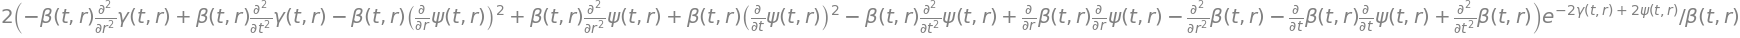

In [73]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [74]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡    ⎛            2                      2                                 2             2  
⎢    ⎜           ∂                      ∂                     ⎛∂          ⎞             ∂   
⎢1.0⋅⎜- β(t, r)⋅───(γ(t, r)) + β(t, r)⋅───(γ(t, r)) - β(t, r)⋅⎜──(ψ(t, r))⎟  + β(t, r)⋅───(ψ
⎢    ⎜            2                      2                    ⎝∂r         ⎠              2  
⎢    ⎝          ∂r                     ∂t                                              ∂r   
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [81]:
simplify(einst.tensor())

⎡    ⎛                       2                        2                               2     
⎢    ⎜          ⎛∂          ⎞            ⎛∂          ⎞    ∂           ∂              ∂      
⎢1.0⋅⎜- β(t, r)⋅⎜──(ψ(t, r))⎟  - β(t, r)⋅⎜──(ψ(t, r))⎟  + ──(β(t, r))⋅──(γ(t, r)) - ───(β(t,
⎢    ⎜          ⎝∂r         ⎠            ⎝∂t         ⎠    ∂r          ∂r              2     
⎢    ⎝                                                                              ∂r      
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                         β(t, r)                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                     ∂           ∂             ∂           ∂         

In [20]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [21]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

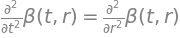

In [175]:
equation5pt6 = Eq(diff(beta,t,t),solve( simplify(einst.tensor())[0,0].args[2]-simplify(einst.tensor())[1,1].args[2], diff(beta,t,t) )[0])
equation5pt6

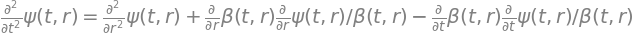

In [178]:
equation5pt7 = Eq(diff(psi,t,t),expand(solve( simplify(simplify(einst.tensor())[3,3].args[1].subs(equation5pt8.args[0],equation5pt8.args[1])), diff(psi,t,t) )[0])).subs(equation5pt6.args[0],equation5pt6.args[1])
equation5pt7

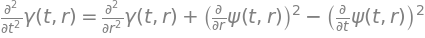

In [148]:
equation5pt8 = Eq(diff(gamma,t,t),solve( simplify(einst.tensor())[2,2].args[2], diff(gamma,t,t) )[0])
equation5pt8

In [180]:
vacuumFieldEquations = Matrix([equation5pt6,equation5pt7,equation5pt8])
vacuumFieldEquations

⎡                            2              2                                   ⎤
⎢                           ∂              ∂                                    ⎥
⎢                          ───(β(t, r)) = ───(β(t, r))                          ⎥
⎢                            2              2                                   ⎥
⎢                          ∂t             ∂r                                    ⎥
⎢                                                                               ⎥
⎢                              ∂           ∂             ∂           ∂          ⎥
⎢  2              2            ──(β(t, r))⋅──(ψ(t, r))   ──(β(t, r))⋅──(ψ(t, r))⎥
⎢ ∂              ∂             ∂r          ∂r            ∂t          ∂t         ⎥
⎢───(ψ(t, r)) = ───(ψ(t, r)) + ─────────────────────── - ───────────────────────⎥
⎢  2              2                    β(t, r)                   β(t, r)        ⎥
⎢∂t             ∂r                                                              ⎥
⎢               